In [3]:
from torch import nn
import torch
import gym
from collections import deque
import itertools
import numpy as np
import random
import torch.nn.functional as F
from datetime import datetime
import matplotlib.pyplot as plt

In [16]:
ENV_Name='CartPole-v0'
torch.manual_seed(2)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
env = gym.make(ENV_Name)
env.seed(0)
env.env.book_or_nips = 'nips'

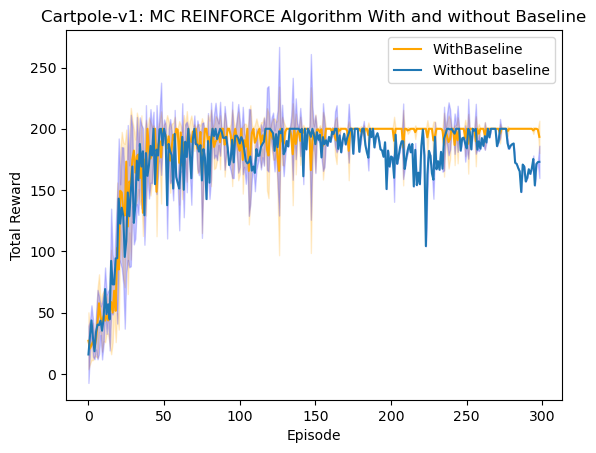

In [18]:
 # mean_rewards_without_baseline = np.mean(rewards_list_without_baseline, axis=0)
 #    std_rewards_without_baseline = np.std(rewards_list_without_baseline, axis=0)
# Mean_Flag = True
mean_Plot_array = []
# Q2_itertaion_0_Reinforce_Base_line_Acrobot-v1_
for k in range(5):
    file_name = f'./npy/Q2_itertaion_{k}_Reinforce_Base_line_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    mean_Plot_array.append(loaded_array)

Mean_Flag = False
max_Plot_array = []
for k in range(5):
    file_name = f'./npy/Q2_itertaion_{k}_Reinforce_WithoutBase_line_{ENV_Name}_.npy'
    loaded_array = np.load(file_name)
    max_Plot_array.append(loaded_array)

mean_scrs = np.mean(mean_Plot_array,axis = 0)
std_mean_scrs = np.std(mean_Plot_array, axis=0)

max_scrs = np.mean(max_Plot_array,axis = 0)
std_max_scrs = np.std(mean_Plot_array,axis= 0)



    # Plot mean rewards with different colors
plt.plot(mean_scrs, label='WithBaseline', color='orange')
plt.plot(max_scrs, label='Without baseline')

# Plot shaded regions for variance (mean +/- std) for both cases
plt.fill_between(range(len(mean_scrs)),
                 mean_scrs - std_mean_scrs,
                 mean_scrs + std_mean_scrs,
                 color='orange', alpha=0.2)

plt.fill_between(range(len(max_scrs)),
                 max_scrs - std_max_scrs,
                 max_scrs + std_max_scrs,
                 color='blue', alpha=0.2)

# Customize plot
plt.title("Cartpole-v1: MC REINFORCE Algorithm With and without Baseline")
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.legend()
plt.savefig('MC_Reinforce_cartpole-std.png')
plt.show()